## Text Processing

### Preprocessing

Preprocessing is a crucial step when working with text models. During this stage, it’s essential to assess the data distribution, decide on appropriate techniques, and determine the depth of cleaning required. Key preprocessing techniques include:

---

**a. Lowercasing**

In text processing, each sentence is broken down into words, with each word treated as a separate token after preprocessing. Since programming languages treat textual data as case-sensitive, "The" is different from "the." Although we understand they are the same, character encoding differentiates them as distinct tokens. Converting to lowercase is, therefore, a mandatory preprocessing step. Using the `numpy` library, we can convert a list of lists to lowercase in one step.

---

**b. Stop Words**

Stop words are common words that add little to the document’s value. Removing these words increases computational efficiency and saves storage space. The `nltk` library provides a convenient method to download stop words, allowing us to remove them without manually specifying each one. Here’s a simple approach to exclude stop words from a text:

```python
new_text = ""
for word in words:
    if word not in stop_words:
        new_text += " " + word
```

---

**c. Punctuation**

Punctuation marks are often unnecessary in text analysis, but handling them carefully is important. For instance, "U.S." could mistakenly be converted to "us" (meaning “United States” to “us”). While hyphens and similar symbols require careful handling, in this case, we’ll remove punctuation symbols as follows:

```python
punctuation = "!"#$%&()*+-./:;<=>?@[]^_`{|}~\n"
```

---

**d. Apostrophes**

Apostrophes require special attention. If we remove them along with punctuation, "don’t" becomes "dont," which isn’t filtered as a stop word. To address this, we remove stop words and punctuation separately, ensuring the proper handling of any apostrophes left over.

---

**e. Single Characters**

Single characters often lack significance in understanding the document’s content and can be irrelevant. Removing these can help streamline the text:

```python
new_text = ""
for w in words:
    if len(w) > 1:
        new_text += " " + w
```

---

**f. Lemmatization**

Lemmatization reduces a word to its base or root form, ensuring it remains a valid word in the language. Unlike stemming, which removes prefixes and suffixes based on rules, lemmatization preserves linguistic meaning. We can use the `WordNetLemmatizer` for this purpose.

- **Stemming vs. Lemmatization**  
    - **Stemming:** Doesn't always produce dictionary words; it removes prefixes and suffixes based on rules.
    - **Lemmatization:** Produces dictionary words and reduces to a root synonym.

---

**g. Stemming**

Stemming is the final step in preprocessing and converts words to their root forms. For example, "playing" and "played" are both reduced to "play." We’ll use the `PorterStemmer`, a rule-based stemmer that removes suffixes and affixes. Note that while the stemmed words may sometimes be unrecognizable, the model will still interpret them correctly.

**Note:** A more efficient approach is to first lemmatize and then stem, although stemming alone may suffice for some tasks. In this case, we’ll focus on stemming.

---

**h. Converting Numbers**

When a user searches for "100 dollars" or "hundred dollars," both queries should ideally yield the same results. To improve our Information Retrieval (IR) model, we can convert numbers to their word form using the `num2word` library. This will help unify representations of numbers, making search results more relevant.

In [3]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re
import joblib
from joblib import dump, load
from flask import Flask, request
import re
from nltk.stem import wordnet, WordNetLemmatizer, LancasterStemmer, PorterStemmer
import json
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

In [4]:
#Importing dataset

message=pd.read_csv(r'C:\Users\vibha\Spam Data\SpamCollection\spam.csv', encoding = "latin-1")

In [5]:
message.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#We will take the relevant information data, i.e. v1 and v2
message= message[["v1", "v2"]]

In [7]:
message.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [8]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
message.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
message["v1"].value_counts()


v1
ham     4825
spam     747
Name: count, dtype: int64

Here we can see, the data is unbalanced data

In [11]:
#Add another coloumn that will give me the count of charachters in a perticular row

message["length"]= message["v2"].apply(len)
message.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
message["length"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [18]:
#Total count of shortest words in dataset

print(message.loc[message["length"]==2]) # Shortest Sentences

print("")

print("Total count of rows of shortest word:" , len(message[message["length"]==2]))

       v1  v2  length
1924  ham  Ok       2
3049  ham  Ok       2
4496  ham  Ok       2
5357  ham  Ok       2

Total count of rows of shortest word: 4


In [19]:
message.loc[message["length"]==910, "v2"][1084] #Longest sentances

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

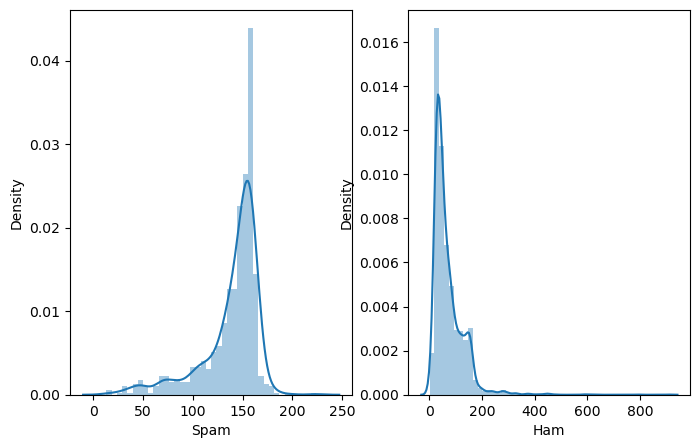

In [20]:
#Spam data vs ham data

spam_data= message.loc[message["v1"]=="spam"]
ham_data= message.loc[message["v1"]=="ham"]

plt.figure(figsize=(8,5))
plt.subplot(121)

sns.distplot(spam_data["length"])
plt.xlabel("Spam")

plt.subplot(122)
sns.distplot(ham_data["length"])
plt.xlabel("Ham")
plt.show()

In [23]:
#Information about spam and ham messages length

describe_dataframe= pd.DataFrame(spam_data["length"].describe())
describe_dataframe.rename(columns={"length":"Spam"}, inplace= True)
describe_dataframe["Ham"]= ham_data["length"].describe()
describe_dataframe

,Spam,Ham
count,747.000000,4825.000000
mean,138.866131,71.023627
std,29.183082,58.016023
min,13.000000,2.000000
25%,132.500000,33.000000
50%,149.000000,52.000000
75%,157.000000,92.000000
max,224.000000,910.000000


## Text preprocessing

Before building model, we need to process the text and then build the model

In [14]:
#Step 1:Removal of Apostrophe
#Step 2: Convert all words ino lowercase
#Step 3: Remove Puncuation
#Step 4: Remove stopwords (dont remove ok and not)
#Step 5: Remove single words
#Step 6: Apply lemmatization
#step 7: Remove numbers


### Step 1: Removal of Apostrophe

In [24]:
contractions = {
"ain't": "are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


contractions2={}

for key, value in contractions.items():
    x= ""
    for char in value:
        if char == "/":
            break
        else:
            x+=char
            
    contractions2[key]= x.strip()
    
def apostrophe_corr(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

message["v2_step1"]= message["v2"].apply(apostrophe_corr)

In [25]:
message.head(10)

,v1,v2,length,v2_step1
0,ham,"Go until jurong point, crazy.. Available only ...",111,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,29,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"Nah I do not think he goes to usf, he lives ar..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,FreeMsg Hey there darling it has / it is been ...
6,ham,Even my brother is not like to speak with me. ...,77,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...,158,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...,154,Had your mobile 11 months or more? U R entitle...


### Step 2 : Lowercase conversion

In [26]:
def lowecase_(text):
    return text.lower()

message["v2_step2"]= message["v2_step1"].apply(lowecase_)


In [27]:
message["v2_step2"][10]

'i am gonna be home soon and i do not want to talk about this stuff anymore tonight, k? i have cried enough today.'

### Step 3: Remove Puncuation

In [28]:
import string

punctuation_char= string.punctuation
punctuation_char

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def rem_puncu(text):
    text= "".join([i for i in text if i not in punctuation_char])
    return text

message["v2_step3"]=message["v2_step2"].apply(rem_puncu)

message["v2_step3"][10]

'i am gonna be home soon and i do not want to talk about this stuff anymore tonight k i have cried enough today'

### Step 4:Remove sopwords

In natural language processing (NLP), stopwords are frequently occuring words filtered out to enhance text analysis and computational efficiency. Eliminating stopwords can improve the accuracy and relevance of NLP tasks by drawing attention to the more important words, or content words.

In [31]:
#Download stopwords from nltk and filter out

nltk.download('stopwords')
stop_words=stopwords.words("English")
print(stop_words)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vibha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
"ok" in stop_words #There were four instances where the message was "ok". 

False

In [33]:
#Now we will remove the stopwords from the text

def rem_stopwords(text):
    text= " ".join([word for word in text.split() if word not in stop_words])
    return text

message["v2_step4"]= message["v2_step3"].apply(rem_stopwords)
message["v2_step4"][10]

'gonna home soon want talk stuff anymore tonight k cried enough today'

### Step 5: Remove single words

In [34]:
#Now we will remove single word as there is no relevance and sense of any single words


def rem_singleW(text):
    text=" ".join([word for word in text.split() if len(word)> 1])
    return text

message["v2_step5"]= message["v2_step4"].apply(rem_singleW)

message["v2_step5"][10]

'gonna home soon want talk stuff anymore tonight cried enough today'

### Step 6: Apply Lemitization:


Lemmatization techniques in natural language processing (NLP) involve methods to identify and transform words into their base or root forms, known as lemmas. These approaches contribute to text normalization, facilitating more accurate language analysis and processing in various NLP applications.

In [35]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer= WordNetLemmatizer()

def lemmatize(text):
    text= " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

message["v2_step6"]= message["v2_step5"].apply(lemmatize)

message["v2_step6"][10]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vibha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'gonna home soon want talk stuff anymore tonight cried enough today'

### Step 7: Remove numbers

In [36]:
def remove_num(text):
    text1= " ".join([s for s in text.split() if re.fullmatch(r'[a-zA-Z ]+', s)])
    return text1

message["v2_step7"]= message["v2_step6"].apply(remove_num)

message["v2_step7"][10]

'gonna home soon want talk stuff anymore tonight cried enough today'

In [39]:
message.head()

,v1,v2,length,v2_step1,v2_step2,v2_step3,v2_step4,v2_step5,v2_step6,v2_step7
0,ham,"Go until jurong point, crazy.. Available only ...",111,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis great wo...,go jurong point crazy available bugis great wo...,go jurong point crazy available bugis great wo...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif oni,ok lar joking wif oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entry wkly comp win fa cup final tkts 21s...,free entry wkly comp win fa cup final tkts 21s...,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say,dun say early hor already say,dun say early hor already say,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"Nah I do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though,nah think goes usf lives around though,nah think go usf life around though,nah think go usf life around though


In [40]:
x= message["v2_step7"][5567]
x

'time tried contact pound prize claim easy call per minute btnationalrate'

In [41]:
dataset= message[["v1", "v2_step7", "length"]]
dataset.rename(columns={"v2_step7": "mail_message"}, inplace = True)
dataset.head()

,v1,mail_message,length
0,ham,go jurong point crazy available bugis great wo...,111
1,ham,ok lar joking wif oni,29
2,spam,free entry wkly comp win fa cup final tkts may...,155
3,ham,dun say early hor already say,49
4,ham,nah think go usf life around though,61


In [42]:
dataset["length2"]= dataset["mail_message"].apply(len)
dataset.head()

,v1,mail_message,length,length2
0,ham,go jurong point crazy available bugis great wo...,111,78
1,ham,ok lar joking wif oni,29,21
2,spam,free entry wkly comp win fa cup final tkts may...,155,98
3,ham,dun say early hor already say,49,29
4,ham,nah think go usf life around though,61,35


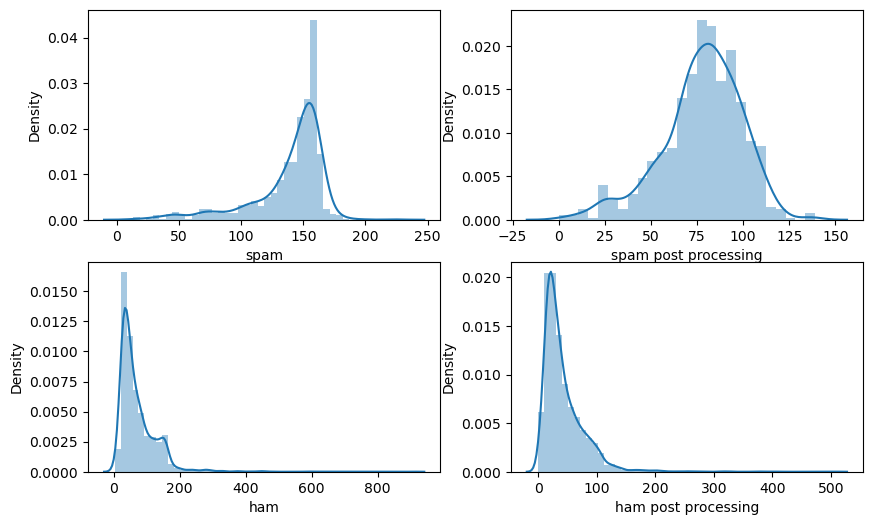

In [43]:
#Now we again plot the distribution of length of messages

spam_data=dataset.loc[dataset["v1"]=="spam"]
ham_data=dataset.loc[dataset["v1"]=="ham"]

plt.figure(figsize=(10,6))
plt.subplot(221)
sns.distplot(spam_data[["length"]])
plt.xlabel("spam")

plt.subplot(222)
sns.distplot(spam_data[["length2"]])
plt.xlabel("spam post processing")

plt.subplot(223)
sns.distplot(ham_data["length"])
plt.xlabel("ham")

plt.subplot(224)
sns.distplot(ham_data[["length2"]])
plt.xlabel("ham post processing")

plt.show()

In [44]:
print("Shape of the data:", dataset.shape)
print(" ")
print("Value counts of the spam and ham data;" , dataset["v1"].value_counts()) #Unbalanced data

Shape of the data: (5572, 4)
 
Value counts of the spam and ham data; v1
ham     4825
spam     747
Name: count, dtype: int64


In [45]:
#Now, we will split the data into training and testing data

from sklearn.model_selection import train_test_split

#Train test split of data
X_train, X_test, Y_train, Y_test = train_test_split(dataset["mail_message"], dataset['v1'], test_size = 0.25, random_state=1, stratify= dataset['v1']  )

The stratify parameter in train_test_split is used to ensure that the train and test sets have the same distribution of classes as the original dataset. This is particularly useful for imbalanced datasets, where one class might be significantly larger than another.

In [46]:
#Training data shape and value counts
print(X_train.shape)
print(Y_train.value_counts())

#The data is unbalance, hence we will do upsampling for the balance of the dataset

(4179,)
v1
ham     3619
spam     560
Name: count, dtype: int64


In [48]:
X_train=pd.DataFrame(X_train)
Y_train= pd.DataFrame(Y_train)
X_train["v1"]=Y_train["v1"]
X_train.head()

,mail_message,v1
2795,tell friend plan valentine day lturlgt,ham
4162,told coming wednesday,ham
4652,lol yes add spice day,ham
4019,university southern california,ham
4134,need say anything know outsider,ham


In [49]:
majority_class = X_train[X_train['v1'] == X_train['v1'].value_counts().idxmax()]
majority_class

,mail_message,v1
2795,tell friend plan valentine day lturlgt,ham
4162,told coming wednesday,ham
4652,lol yes add spice day,ham
4019,university southern california,ham
4134,need say anything know outsider,ham
...,...,...
4771,hi mobile ltgt added contact list wwwfullonsms...,ham
1225,sir receive account another time sorry delay,ham
1196,said matter mind saying matter,ham
1769,ha u thing got tv watch thk go tonight already...,ham


In [50]:
from sklearn.utils import resample


majority_class = X_train[X_train['v1'] == X_train['v1'].value_counts().idxmax()]
print("Shape of majority_class:", majority_class.shape)

minority_class = X_train[X_train['v1'] == X_train['v1'].value_counts().idxmin()]
print("Shape of minority_class:", minority_class.shape)


#majority_class_upsample=resample(majority_class, n_samples=, replace= True, random_state=42)
minority_upsample= resample(minority_class, n_samples=len(majority_class), replace=True, random_state=42)
data_upsampled= pd.concat([majority_class,minority_upsample] )

print(" ")

print("*********************************************************************")
print(" ")

print("Shape of majority_class_upsample:", majority_class.shape)
print("Shape of minority_upsample:", minority_upsample.shape)

Shape of majority_class: (3619, 2)
Shape of minority_class: (560, 2)
 
*********************************************************************
 
Shape of majority_class_upsample: (3619, 2)
Shape of minority_upsample: (3619, 2)


In [51]:
#upsampled dataset
print(data_upsampled.shape)
print(data_upsampled.head())

(7238, 2)
                                mail_message   v1
2795  tell friend plan valentine day lturlgt  ham
4162                   told coming wednesday  ham
4652                   lol yes add spice day  ham
4019          university southern california  ham
4134         need say anything know outsider  ham


In [52]:
#Now we will do feature enginnering by using bag of words, TF-IDF, and word2Vec

## Feature Engineering

### Text vectorization: Bag of Words


 Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

This model can be visualized using a table, which contains the count of words corresponding to the word itself.

In [53]:
nltk.download('punkt')

word2count = {} 
for data in data_upsampled["mail_message"]:
    words=nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word]=1
        else:
            word2count[word]+=1.
            

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vibha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
word_count=pd.DataFrame()
word_count["Words"]= word2count.keys()
word_count["Count"]= word2count.values()
print(word_count.head())
print()
print(word_count.shape)

       Words  Count
0       tell  200.0
1     friend  159.0
2       plan   35.0
3  valentine   25.0
4        day  298.0

(6429, 2)


There are total 6429 unique words in messages

In [57]:
# Vectorization

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

#binary bag of words
count_vector= CountVectorizer()
binary_bag_words=count_vector.fit( raw_documents=data_upsampled["mail_message"])

In [59]:
binary_bag_words.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [60]:
#print total number of vocab words

print(len(binary_bag_words.vocabulary_))


6420


we have 6420 words in vocabulary.

In [61]:
[v for v in binary_bag_words.vocabulary_.items()][0:5]

[('tell', 5487),
 ('friend', 2043),
 ('plan', 4090),
 ('valentine', 5931),
 ('day', 1289)]

In [62]:
#For test the BoW model, lets convert the 10th row of dataset into vector

message=data_upsampled["mail_message"][10]
print(message)

print("\n")

##Use bow.transform to transform the dataset 
bow10= binary_bag_words.transform([message])
print(bow10)

## Transform outputs the sparse matrix of indexes along with the number of times each word occurs in that index.
print("\n")
print("Class of bow:", type(bow10))
print('\n')
print("BoW dimension:", bow10.ndim)
print("BoW shape:", bow10.shape)
print('\n')


gonna home soon want talk stuff anymore tonight cried enough today


  (0, 236)	1
  (0, 1193)	1
  (0, 1674)	1
  (0, 2199)	1
  (0, 2471)	1
  (0, 5088)	1
  (0, 5300)	1
  (0, 5434)	1
  (0, 5647)	1
  (0, 5680)	1
  (0, 6050)	1


Class of bow: <class 'scipy.sparse._csr.csr_matrix'>


BoW dimension: 2
BoW shape: (1, 6420)




Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages.

Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [63]:
#Transformation of training and testing dataset

bag_of_words_training= binary_bag_words.transform(data_upsampled["mail_message"])
bag_of_words_testing=binary_bag_words.transform(X_test)

In [64]:
print(bag_of_words_training.shape)
print(Y_train.shape)

(7238, 6420)
(4179, 1)


In [65]:
#Check the shape of sparse matrix usinh .shape

print("Shape of the matrix:", bag_of_words_training.shape)

#Check the amount of non zero occurance using .nnz

print("Amount of non zero occurance:",bag_of_words_training.nnz )

Shape of the matrix: (7238, 6420)
Amount of non zero occurance: 68828


In [66]:
sparsity_per= bag_of_words_training.nnz/(bag_of_words_training.shape[0]*bag_of_words_training.shape[1])*100

print("Sparcity percentage:", sparsity_per)

Sparcity percentage: 0.1481192632514963


In [67]:
sorted_by_values = dict(sorted(binary_bag_words.vocabulary_.items(), key=lambda item: item[1]))

In [68]:
sorted_by_values

{'aa': 0,
 'aah': 1,
 'aaniye': 2,
 'aaooooright': 3,
 'aathilove': 4,
 'aathiwhere': 5,
 'ab': 6,
 'abbey': 7,
 'abdomen': 8,
 'abeg': 9,
 'abel': 10,
 'aberdeen': 11,
 'abi': 12,
 'ability': 13,
 'abiola': 14,
 'abj': 15,
 'able': 16,
 'abnormally': 17,
 'absence': 18,
 'absolutely': 19,
 'abt': 20,
 'abta': 21,
 'aburo': 22,
 'abuse': 23,
 'abuser': 24,
 'ac': 25,
 'acc': 26,
 'accent': 27,
 'accept': 28,
 'access': 29,
 'accessible': 30,
 'accidant': 31,
 'accident': 32,
 'accidentally': 33,
 'accommodation': 34,
 'accordin': 35,
 'accordingly': 36,
 'accordinglyor': 37,
 'account': 38,
 'accumulation': 39,
 'achanammarakheshqatar': 40,
 'ache': 41,
 'acid': 42,
 'across': 43,
 'acsmsrewards': 44,
 'act': 45,
 'acted': 46,
 'actin': 47,
 'action': 48,
 'activate': 49,
 'active': 50,
 'activity': 51,
 'actor': 52,
 'actual': 53,
 'actually': 54,
 'ad': 55,
 'adam': 56,
 'add': 57,
 'addamsfa': 58,
 'added': 59,
 'addicted': 60,
 'addie': 61,
 'adding': 62,
 'address': 63,
 'addressu

In [69]:
#converting sparse matrix into DataFrame

vector_dataframe=pd.DataFrame.sparse.from_spmatrix(bag_of_words_training)
print(vector_dataframe.head())
print("******************************************************************")


#Now we will rename all unique words as a column name

dict_= dict(zip(np.arange(0,vector_dataframe.shape[1]), sorted_by_values.keys()))

vector_dataframe.rename(columns= dict_, inplace= True)
print(vector_dataframe.head())



   0     1     2     3     4     5     6     7     8     9     ...  6410  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...     0   

   6411  6412  6413  6414  6415  6416  6417  6418  6419  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 6420 columns]
******************************************************************
   aa  aah  aaniye  aaooooright  aathilove  aathiwhere  ab  abbey  abdomen  \
0   0    0       0       

## TF-IDF

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(ngram_range=(1, 2)) #unigrams and bigrams

tfidf_vect= tfidf_vect.fit(data_upsampled["mail_message"])


In [71]:
#print total number of vocab words

print(len(tfidf_vect.vocabulary_))       #vocabulary in TFIDF
print(len(binary_bag_words.vocabulary_)) #vocabulary in BoW

29230
6420


In [72]:
tfidf_vect.vocabulary_.items()

dict_items([('tell', 24374), ('friend', 8491), ('plan', 18769), ('valentine', 26791), ('day', 5393), ('lturlgt', 14564), ('tell friend', 24396), ('friend plan', 8526), ('plan valentine', 18790), ('valentine day', 26792), ('day lturlgt', 5448), ('told', 25527), ('coming', 4454), ('wednesday', 27583), ('told coming', 25533), ('coming wednesday', 4473), ('lol', 13970), ('yes', 28931), ('add', 185), ('spice', 23121), ('lol yes', 14005), ('yes add', 28932), ('add spice', 189), ('spice day', 23122), ('university', 26386), ('southern', 23014), ('california', 3013), ('university southern', 26388), ('southern california', 23015), ('need', 16553), ('say', 21079), ('anything', 935), ('know', 12789), ('outsider', 17994), ('need say', 16623), ('say anything', 21082), ('anything know', 955), ('know outsider', 12887), ('hiya', 11016), ('stu', 23666), ('wot', 28488), ('much', 16213), ('truble', 25956), ('home', 11125), ('moment', 15883), ('evone', 7259), ('hate', 10528), ('even', 7096), ('hell', 10712

In [73]:
#Transforming training and testing data

tfidf_training= tfidf_vect.transform(data_upsampled["mail_message"])
tfidf_testing= tfidf_vect.transform(X_test)


In [74]:
#check the shape of sparse matrix 

print("Shape of the Sparce matrix:", tfidf_training.shape)

#check the amount of non zero occurance using.nnz

print("Amount of non zeri occurance:", tfidf_training.nnz)

Shape of the Sparce matrix: (7238, 29230)
Amount of non zeri occurance: 133909


In [75]:
#Calculate the sparcity percentage

sparcity= tfidf_training.nnz/(tfidf_training.shape[0]*tfidf_training.shape[1])*100
print("Sparcity in percentage:", sparcity)

Sparcity in percentage: 0.06329397522502828


## Word2Vec

Word2Vec is a widely used method in natural language processing (NLP) that allows words to be represented as vectors in a continuous vector space. Word2Vec is an effort to map words to high-dimensional vectors to capture the semantic relationships between words, developed by researchers at Google. Words with similar meanings should have similar vector representations, according to the main principle of Word2Vec.

In [76]:
#I will train my own word 2 vec model using my own text corpus
from gensim.models import Word2Vec


i=0
list_of_sentances=[]

for sentance in data_upsampled["mail_message"]:
    list_of_sentances.append(sentance.split())


#Training of my own w2v model

w2v_model= Word2Vec(list_of_sentances, min_count= 5, vector_size=300, workers=6)

In [77]:
w2v_model.wv.most_similar("ok")

[('got', 0.9996623396873474),
 ('come', 0.9995512962341309),
 ('home', 0.9994672536849976),
 ('thing', 0.9994401931762695),
 ('im', 0.9993888139724731),
 ('way', 0.9993820786476135),
 ('going', 0.9993807673454285),
 ('hope', 0.9993589520454407),
 ('say', 0.9993232488632202),
 ('one', 0.9993048310279846)]

## Model Building

## 1.Naive Bayes Model

In [78]:
#Naive bayes for Bag of word data

#Train test split for bag_of_words data
#X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, dataset['v1'], test_size = 0.25, random_state=1)

x_train= bag_of_words_training
y_train= data_upsampled["v1"]

x_test=bag_of_words_testing
y_test= Y_test

#Building naive bayes model for BOW data
from sklearn.naive_bayes import MultinomialNB

naive_bayes_bow= MultinomialNB()
naive_bayes_bow.fit(x_train, y_train)

MultinomialNB()

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Metrics for Bag of words model
print('The shape of X_train is {}'.format(x_train.shape))
print('The shape of X_test is {}'.format(x_test.shape))
print('\n')
print('The accuracy for Binary BOW model is {}'.format(accuracy_score(Y_test, naive_bayes_bow.predict(x_test))))
print('\n')
print('The confusion matrix for Binary BOW model is :')
print(confusion_matrix(Y_test, naive_bayes_bow.predict(x_test)))
print('\n')
print('The classification report for Binary BOW model is :')
print(classification_report(Y_test, naive_bayes_bow.predict(x_test)))

The shape of X_train is (7238, 6420)
The shape of X_test is (1393, 6420)


The accuracy for Binary BOW model is 0.9612347451543432


The confusion matrix for Binary BOW model is :
[[1160   46]
 [   8  179]]


The classification report for Binary BOW model is :
              precision    recall  f1-score   support

         ham       0.99      0.96      0.98      1206
        spam       0.80      0.96      0.87       187

    accuracy                           0.96      1393
   macro avg       0.89      0.96      0.92      1393
weighted avg       0.97      0.96      0.96      1393



In [87]:
#Naive bayes for tfidf data

x_train= tfidf_training
y_train= data_upsampled["v1"]

x_test=tfidf_testing
y_test= Y_test

#Building naive bayes model for BOW data
from sklearn.naive_bayes import MultinomialNB

naive_bayes_tfidf= MultinomialNB()
naive_bayes_tfidf.fit(x_train, y_train)

MultinomialNB()

In [88]:

#Metrics for TF-IDF model
print('The shape of X_train is {}'.format(x_train.shape))
print('The shape of X_test is {}'.format(x_test.shape))
print('\n')
print('The accuracy for TF-IDF model is {}'.format(accuracy_score(Y_test, naive_bayes_tfidf.predict(x_test))))
print('\n')
print('The confusion matrix for TF-IDF model is :')
print(confusion_matrix(Y_test, naive_bayes_tfidf.predict(x_test)))
print('\n')
print('The classification report for TF-IDF model is :')
print(classification_report(Y_test, naive_bayes_tfidf.predict(x_test)))

The shape of X_train is (7238, 29230)
The shape of X_test is (1393, 29230)


The accuracy for TF-IDF model is 0.9569274946159368


The confusion matrix for TF-IDF model is :
[[1154   52]
 [   8  179]]


The classification report for TF-IDF model is :
              precision    recall  f1-score   support

         ham       0.99      0.96      0.97      1206
        spam       0.77      0.96      0.86       187

    accuracy                           0.96      1393
   macro avg       0.88      0.96      0.92      1393
weighted avg       0.96      0.96      0.96      1393



## 2. Logistic Regression Model

In [83]:
from sklearn.linear_model import LogisticRegression

#Train test split for bag_of_words data
#X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, dataset['v1'], test_size = 0.25, random_state=1)

x_train= bag_of_words_training
y_train= data_upsampled["v1"]

x_test=bag_of_words_testing
y_test= Y_test


logistic_regression_bow= LogisticRegression()
logistic_regression_bow.fit(x_train, y_train)


LogisticRegression()

In [84]:

#Metrics for Bag of words model
print('The shape of X_train is {}'.format(x_train.shape))
print('The shape of X_test is {}'.format(x_test.shape))
print('\n')
print('The accuracy for Binary BOW model is {}'.format(accuracy_score(Y_test, logistic_regression_bow.predict(x_test))))
print('\n')
print('The confusion matrix for Binary BOW model is :')
print(confusion_matrix(Y_test, logistic_regression_bow.predict(x_test)))
print('\n')
print('The classification report for Binary BOW model is :')
print(classification_report(Y_test, logistic_regression_bow.predict(x_test)))

The shape of X_train is (7238, 6420)
The shape of X_test is (1393, 6420)


The accuracy for Binary BOW model is 0.9806173725771715


The confusion matrix for Binary BOW model is :
[[1200    6]
 [  21  166]]


The classification report for Binary BOW model is :
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.97      0.89      0.92       187

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [85]:
#Logistic regression for tfidf data

x_train= tfidf_training
y_train= data_upsampled["v1"]

x_test=tfidf_testing
y_test= Y_test


logistic_regression_tfidf= LogisticRegression()
logistic_regression_tfidf.fit(x_train, y_train)

LogisticRegression()

In [89]:
#Metrics for TF-IDF model
print('The shape of X_train is {}'.format(x_train.shape))
print('The shape of X_test is {}'.format(x_test.shape))
print('\n')
print('The accuracy for TF-IDF model is {}'.format(accuracy_score(Y_test, logistic_regression_tfidf.predict(x_test))))
print('\n')
print('The confusion matrix for TF-IDF model is :')
print(confusion_matrix(Y_test, logistic_regression_tfidf.predict(x_test)))
print('\n')
print('The classification report for TF-IDF model is :')
print(classification_report(Y_test, logistic_regression_tfidf.predict(x_test)))

The shape of X_train is (7238, 29230)
The shape of X_test is (1393, 29230)


The accuracy for TF-IDF model is 0.9763101220387652


The confusion matrix for TF-IDF model is :
[[1185   21]
 [  12  175]]


The classification report for TF-IDF model is :
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1206
        spam       0.89      0.94      0.91       187

    accuracy                           0.98      1393
   macro avg       0.94      0.96      0.95      1393
weighted avg       0.98      0.98      0.98      1393

